<a href="https://colab.research.google.com/github/parmidamardi/CDM_TA_5/blob/main/CDM_TA_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
#Section 1

In [79]:
#step 1.1

In [50]:
import pandas as pd
import numpy as np


X = pd.read_csv(
    "https://raw.githubusercontent.com/parmidamardi/CDM_TA_5/refs/heads/main/secom.data",
    sep=" ",
    header=None
)

y = pd.read_csv(
    "https://raw.githubusercontent.com/parmidamardi/CDM_TA_5/refs/heads/main/secom_labels.data",
    header=None
)
y_clean = y[0].astype(str).str.extract(r'(^-?\d+)').astype(int)


In [51]:
print(X.shape)
print(y.shape)


(1567, 590)
(1567, 1)


In [52]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0.0)
X_no_const = vt.fit_transform(X)


In [53]:
print("Original features:", X.shape[1])
print("Remaining features:", X_no_const.shape[1])
print("Removed zero-variance features:", X.shape[1] - X_no_const.shape[1])


Original features: 590
Remaining features: 474
Removed zero-variance features: 116


In [54]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X_no_const)


In [55]:
print("Remaining NaNs:", np.isnan(X_imputed).sum())


Remaining NaNs: 0


In [56]:
#step 1.2

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


In [58]:
import numpy as np

print(np.mean(X_scaled, axis=0)[:5])
print(np.std(X_scaled, axis=0)[:5])

[ 1.62332035e-15 -5.07372631e-15 -5.71336214e-15 -1.26963603e-16
  0.00000000e+00]
[1. 1. 1. 1. 1.]


In [59]:
#Section 2

In [60]:
#step 2.1

In [61]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np
import time


y_vec = y_clean.values.ravel()

start_time = time.time()

mi_scores = mutual_info_classif(
    X_scaled,
    y_vec,
    random_state=42
)

end_time = time.time()
mi_time = end_time - start_time
print(f"MI execution time: {mi_time:.4f} seconds")


selected_columns = X.columns[vt.get_support()]

mi_series = pd.Series(
    mi_scores,
    index=selected_columns
)

mi_series_sorted = mi_series.sort_values(ascending=False)



MI execution time: 8.7799 seconds


In [62]:
mi_top20 = mi_series_sorted.head(20)
print(mi_top20)

573    0.028076
541    0.026715
477    0.026543
577    0.026017
41     0.025307
40     0.023929
570    0.022689
571    0.022443
127    0.022040
128    0.021949
406    0.021681
33     0.021454
575    0.021226
443    0.021072
275    0.020829
65     0.020774
122    0.020671
407    0.020305
411    0.020070
305    0.020014
dtype: float64


In [63]:
#step 2.2

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import time

X_scaled_df = pd.DataFrame(
    X_scaled,
    columns=X.columns[vt.get_support()]
)

rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rfe = RFE(
    estimator=rf,
    n_features_to_select=20,
    step=5
)


In [65]:
start_time = time.time()
rfe.fit(X_scaled_df, y_vec)
end_time = time.time()

print(f"RFE execution time: {end_time - start_time:.2f} seconds")


RFE execution time: 94.29 seconds


In [66]:
rfe_time = end_time - start_time

In [67]:
rfe_features = X_scaled_df.columns[rfe.get_support()]

rfe_top20 = pd.Series(
    data=np.arange(1, 21),
    index=rfe_features[:20],
    name="RFE_Rank"
)

print("Top 20 features selected by RFE :")
print(rfe_top20)

Top 20 features selected by RFE :
2       1
21      2
25      3
40      4
59      5
64      6
65      7
99      8
103     9
132    10
153    11
205    12
301    13
348    14
425    15
426    16
441    17
477    18
539    19
562    20
Name: RFE_Rank, dtype: int64


In [68]:
#Section 3

In [69]:
#step 3.1 and 3.2 and 3.3

In [70]:
start_time = time.perf_counter()

U, S, VT = np.linalg.svd(X_scaled, full_matrices=False)

k =  60
sigma_squared = S[:k] ** 2
V_k = VT[:k, :]

svd_scores = np.sum(
    sigma_squared[:, np.newaxis] * np.abs(V_k),
    axis=0
)

svd_scores_series = pd.Series(
    svd_scores,
    index=X_scaled_df.columns,
    name="SVD_Score"
).sort_values(ascending=False)

top_20_svd_features = svd_scores_series.head(20)

end_time = time.perf_counter()

svd_time = end_time - start_time

print("Top 20 SVD features:")
print(top_20_svd_features)
print(f"\nSVD Feature Selection Time: {svd_time:.4f} seconds")


Top 20 SVD features:
62     20857.115604
65     20200.100533
346    20165.449077
73     20074.799990
426    20072.922782
124    20030.071029
345    19986.009863
288    19978.142171
45     19944.918451
121    19894.043954
153    19870.963978
72     19858.850970
526    19787.426338
440    19735.385668
473    19733.085182
254    19727.908629
392    19687.965255
46     19638.211746
318    19578.165640
441    19532.706047
Name: SVD_Score, dtype: float64

SVD Feature Selection Time: 0.1971 seconds


In [71]:
#Section 4

In [72]:
#step 4.1

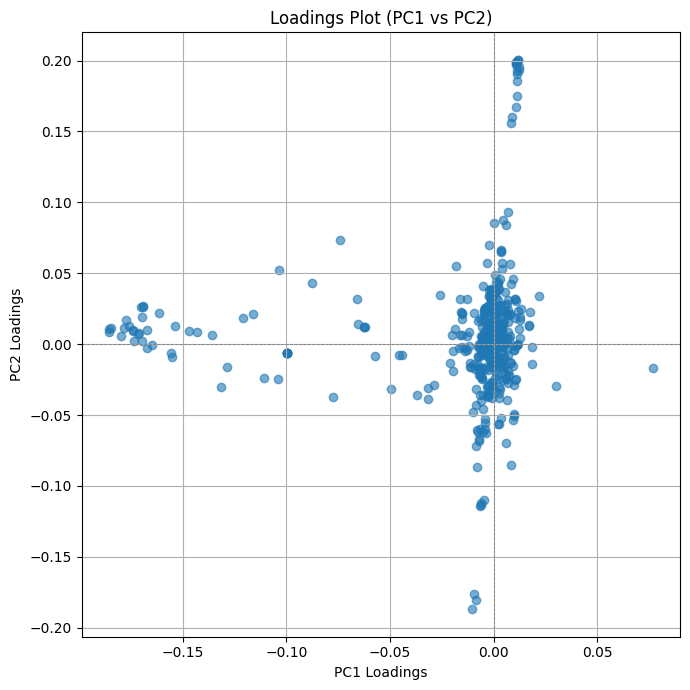

In [73]:
import matplotlib.pyplot as plt

V = VT.T

pc1 = V[:, 0]
pc2 = V[:, 1]

plt.figure(figsize=(7, 7))
plt.scatter(pc1, pc2, alpha=0.6)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.6)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.6)

plt.xlabel("PC1 Loadings")
plt.ylabel("PC2 Loadings")
plt.title("Loadings Plot (PC1 vs PC2)")
plt.grid(True)
plt.tight_layout()
plt.show()


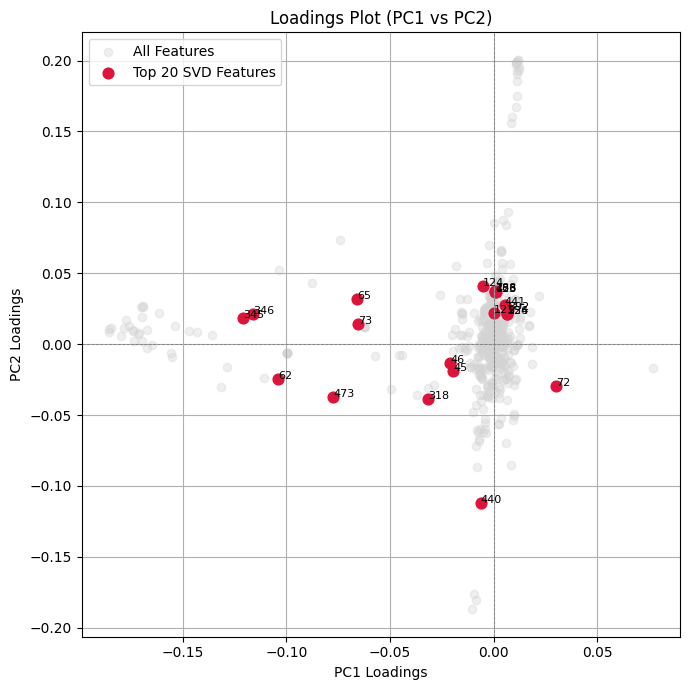

In [74]:
feature_names = X_scaled_df.columns.to_numpy()

top20_mask = np.isin(feature_names, top_20_svd_features.index)

plt.figure(figsize=(7, 7))

plt.scatter(
    pc1,
    pc2,
    color='lightgray',
    alpha=0.35,
    label='All Features'
)

plt.scatter(
    pc1[top20_mask],
    pc2[top20_mask],
    color='crimson',
    s=60,
    label='Top 20 SVD Features'
)

for x, y, name in zip(
    pc1[top20_mask],
    pc2[top20_mask],
    feature_names[top20_mask]
):
    plt.text(x, y, name, fontsize=8)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.6)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.6)

plt.xlabel("PC1 Loadings")
plt.ylabel("PC2 Loadings")
plt.title("Loadings Plot (PC1 vs PC2)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:
#step 4.2

In [76]:
np.random.seed(42)

noise = 0.05 * np.std(X_scaled, axis=0) * np.random.randn(*X_scaled.shape)
X_noisy = X_scaled + noise

X_noisy_df = pd.DataFrame(
    X_noisy,
    columns=X.columns[vt.get_support()]
)

In [77]:
U, S, VT = np.linalg.svd(X_noisy, full_matrices=False)

k = 20
sigma_squared = S[:k] ** 2
V_k = VT[:k, :]

svd_scores = np.sum(
    sigma_squared[:, np.newaxis] * np.abs(V_k),
    axis=0
)

svd_scores_series = pd.Series(
    svd_scores,
    index=X_noisy_df.columns,
    name="SVD_Score"
).sort_values(ascending=False)

svd_top20_noisy = svd_scores_series.head(20)

print("Top 20 features selected by SVD after adding 5% random noise:")
print(svd_top20_noisy)


Top 20 features selected by SVD after adding 5% random noise:
62     14707.270454
206    14655.072134
342    14641.278726
478    14640.853732
347    14635.852400
209    14633.106695
74     14615.773216
303    13707.858139
338    13666.539125
202    13654.242863
168    13417.603164
267    13369.570287
405    13326.229880
539    13230.911848
440    13179.079034
339    13113.406517
336    13056.964037
46     12967.308270
406    12947.680873
304    12887.221967
Name: SVD_Score, dtype: float64


In [31]:
rfe.fit(X_noisy_df, y_vec)



RFE(estimator=RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                                     random_state=42),
    n_features_to_select=20, step=5)

In [32]:
rfe_noisy_features = X_noisy_df.columns[rfe.get_support()]

rfe_top20_noisy = pd.Series(
    data=np.arange(1, 21),
    index=rfe_noisy_features[:20],
    name="RFE_Rank"
)

print("Top 20 features selected by RFE after adding 5% random noise:")
print(rfe_top20_noisy)

Top 20 features selected by RFE after adding 5% random noise:
2       1
16      2
25      3
59      4
64      5
65      6
71      7
103     8
132     9
156    10
166    11
267    12
348    13
425    14
426    15
434    16
441    17
477    18
561    19
571    20
Name: RFE_Rank, dtype: int64


In [33]:
def compare_topk(clean, noisy, k=20):
    clean_set = set(clean.index if hasattr(clean, "index") else clean)
    noisy_set = set(noisy.index if hasattr(noisy, "index") else noisy)

    intersection = clean_set.intersection(noisy_set)

    overlap = len(intersection)
    overlap_pct = overlap / k * 100
    change_pct = 100 - overlap_pct

    return overlap, overlap_pct, change_pct, intersection


In [34]:
svd_overlap, svd_overlap_pct, svd_change_pct, svd_common = compare_topk(
    top_20_svd_features,
    svd_top20_noisy
)


In [35]:
rfe_overlap, rfe_overlap_pct, rfe_change_pct, rfe_common = compare_topk(
    rfe_top20,
    rfe_top20_noisy
)


In [36]:
stability_df = pd.DataFrame({
    "Method": ["SVD", "RFE"],
    "Overlap (Top-20)": [svd_overlap, rfe_overlap],
    "Overlap (%)": [svd_overlap_pct, rfe_overlap_pct],
    "Change (%)": [svd_change_pct, rfe_change_pct]
})

stability_df.set_index("Method", inplace=True)
stability_df


,Overlap (Top-20),Overlap (%),Change (%)
Method,,,
SVD,3,15.0,85.0
RFE,12,60.0,40.0


In [37]:
#Section 5

In [38]:
X_mi = X_scaled_df[mi_top20.index]

X_rfe = X_scaled_df[rfe_top20.index]

X_svd = X_scaled_df[top_20_svd_features.index]

In [39]:
from sklearn.model_selection import train_test_split

X_mi_tr, X_mi_te, y_tr, y_te = train_test_split(
    X_mi,
    y_vec,
    test_size=0.3,
    random_state=42
)

X_rfe_tr, X_rfe_te, _, _ = train_test_split(
    X_rfe,
    y_vec,
    test_size=0.3,
    random_state=42
)

X_svd_tr, X_svd_te, _, _ = train_test_split(
    X_svd,
    y_vec,
    test_size=0.3,
    random_state=42
)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

logreg = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight="balanced"
)

In [41]:
logreg.fit(X_mi_tr, y_tr)
y_pred_mi = logreg.predict(X_mi_te)

acc_mi = accuracy_score(y_te, y_pred_mi)
f1_mi = f1_score(y_te, y_pred_mi, average="weighted")

In [42]:
logreg.fit(X_rfe_tr, y_tr)
y_pred_rfe = logreg.predict(X_rfe_te)

acc_rfe = accuracy_score(y_te, y_pred_rfe)
f1_rfe = f1_score(y_te, y_pred_rfe, average="weighted")


In [43]:
logreg.fit(X_svd_tr, y_tr)
y_pred_svd = logreg.predict(X_svd_te)

acc_svd = accuracy_score(y_te, y_pred_svd)
f1_svd = f1_score(y_te, y_pred_svd, average="weighted")

In [44]:
final_results = pd.DataFrame({
    "Method": ["MI", "RFE", "SVD"],
    "Accuracy": [acc_mi, acc_rfe, acc_svd],
    "F1-Score (weighted)": [f1_mi, f1_rfe, f1_svd],
    "Feature Selection Time (s)": [mi_time, rfe_time, svd_time]
})

In [45]:
final_results

,Method,Accuracy,F1-Score (weighted),Feature Selection Time (s)
0,MI,0.598726,0.698830,8.288556
1,RFE,0.772824,0.825649,94.736051
2,SVD,0.636943,0.728289,1.502629


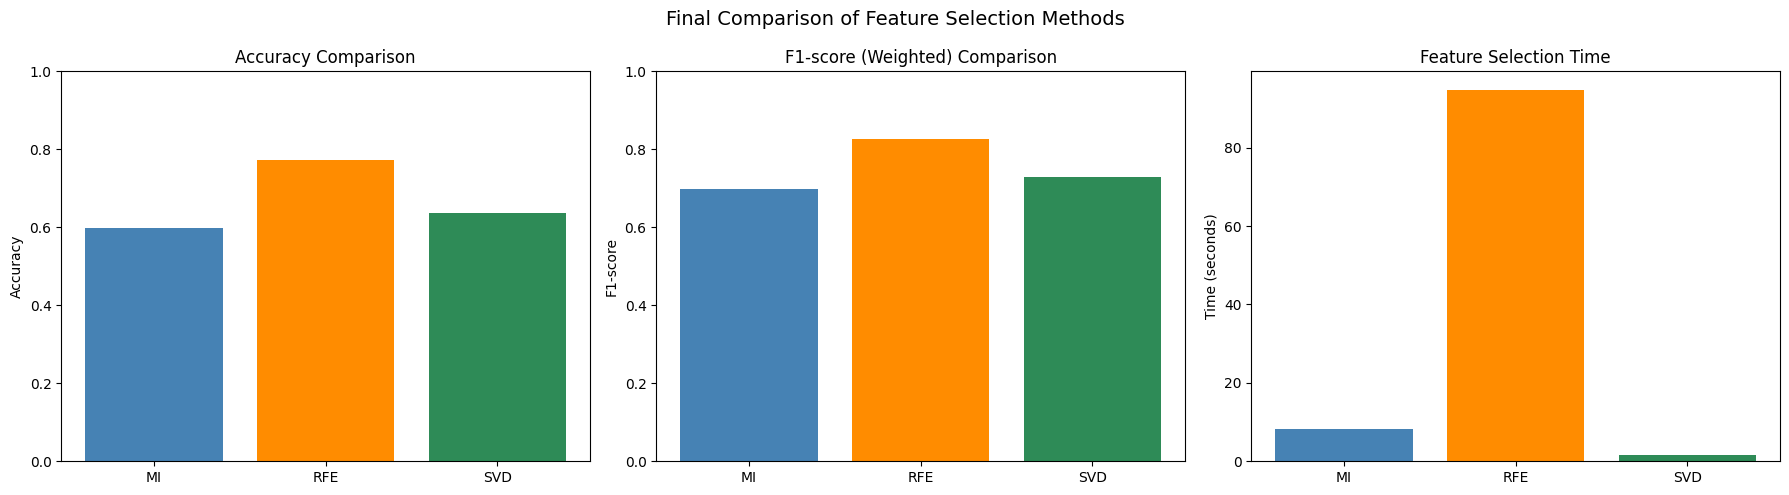

In [46]:
import matplotlib.pyplot as plt
import numpy as np

methods = final_results["Method"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].bar(
    methods,
    final_results["Accuracy"],
    color=["steelblue", "darkorange", "seagreen"]
)
axes[0].set_title("Accuracy Comparison")
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0, 1)

axes[1].bar(
    methods,
    final_results["F1-Score (weighted)"],
    color=["steelblue", "darkorange", "seagreen"]
)
axes[1].set_title("F1-score (Weighted) Comparison")
axes[1].set_ylabel("F1-score")
axes[1].set_ylim(0, 1)

axes[2].bar(
    methods,
    final_results["Feature Selection Time (s)"],
    color=["steelblue", "darkorange", "seagreen"]
)
axes[2].set_title("Feature Selection Time")
axes[2].set_ylabel("Time (seconds)")

plt.suptitle("Final Comparison of Feature Selection Methods", fontsize=14)
plt.tight_layout()
plt.show()


In [47]:
set_rfe = set(rfe_top20.index)
set_svd = set(top_20_svd_features.index)

common_features = set_rfe.intersection(set_svd)

overlap_percentage = (len(common_features) / len(set_rfe)) * 100

print("Number of RFE features:", len(set_rfe))
print("Number of SVD features:", len(set_svd))
print("Number of common features:", len(common_features))
print(f"Overlap percentage: {overlap_percentage:.2f}%")


Number of RFE features: 20
Number of SVD features: 20
Number of common features: 4
Overlap percentage: 20.00%


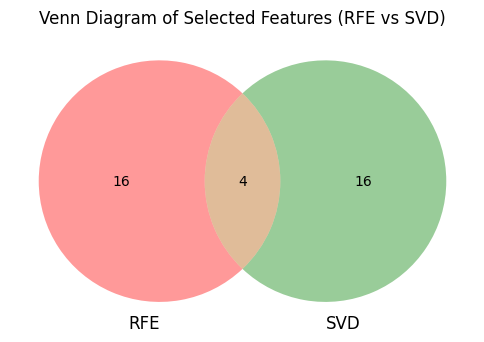

In [48]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

plt.figure(figsize=(6, 6))

venn2(
    subsets=(
        len(set_rfe - set_svd),
        len(set_svd - set_rfe),
        len(common_features)
    ),
    set_labels=('RFE', 'SVD')
)

plt.title("Venn Diagram of Selected Features (RFE vs SVD)")
plt.show()
